# Data Import and Preperation

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import re

In [30]:
%matplotlib notebook

from matplotlib import rc

import seaborn as sns
sns.set()
sns.color_palette("bright")
sns.set_color_codes(palette='bright')

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [31]:
df = pd.read_csv(
    "/Users/JulianSanten/GIT/OMEL_GIT/Data/22-11-17-AP-3-120_MultipleSingleDot_Measurement/analysis/g2/state_files.csv")

In [42]:
df["total_photons"] = df.nrphotons0 + df.nrphotons1

In [102]:
df["g2_computed"] = df[(df["state"] == "singular") | (df["state"] == "non_singular")]["total_photons"]
df["g2_discarded"] = df[(df["state"] == "discarded")]["total_photons"]
df

,name,nrphotons0,nrphotons1,state,g2_tau_zero,bgcts,bgcps,onbincount,total_photons,g2_computed,g2_discarded
0,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",190038.0,201810.0,discarded,NaN,140140.000000,469.323510,2986.0,391848.0,NaN,391848.0
1,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",304305.0,324146.0,singular,0.421617,138016.666667,461.748634,2989.0,628451.0,628451.0,NaN
2,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",332462.0,410130.0,discarded,NaN,128700.000000,432.314410,2977.0,742592.0,NaN,742592.0
3,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",80794.0,76707.0,discarded,NaN,117476.666667,392.242627,2995.0,157501.0,NaN,157501.0
4,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",86696.0,87048.0,discarded,NaN,116436.666667,389.159982,2992.0,173744.0,NaN,173744.0
...,...,...,...,...,...,...,...,...,...,...,...
165,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",234677.0,264335.0,discarded,NaN,123890.000000,416.857335,2972.0,499012.0,NaN,499012.0
166,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",75713.0,70243.0,discarded,NaN,119296.666667,398.718806,2992.0,145956.0,NaN,145956.0
167,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",427400.0,529267.0,singular,0.365943,142263.333333,475.002782,2995.0,956667.0,956667.0,NaN
168,"AP-3-120_C1x10-6_SingleDot_2,5x10+6Hz_405exct_...",312648.0,418008.0,discarded,NaN,132036.666667,441.446562,2991.0,730656.0,NaN,730656.0


In [74]:
df_g2 = df[(df["state"] == "singular") | (df["state"] == "non_singular")]
df_discarded = df[(df["state"] == "discarded")]

<IPython.core.display.Javascript object>


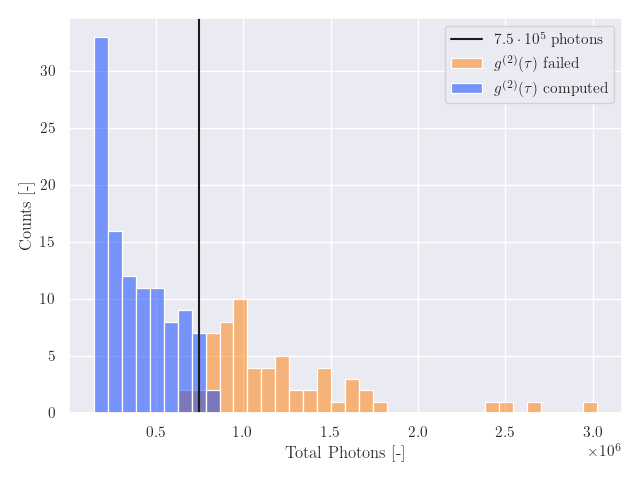

In [136]:
plt.figure()
BINWIDTH = 0.8*1e5
sns.set_palette("bright")
sns.histplot(data=df[['g2_discarded', 'g2_computed']], binwidth=BINWIDTH, palette="bright")
plt.axvline(x=0.75*1e6, color="k")
plt.legend([r"$7.5 \cdot 10^{5}$ photons", r"$g^{(2)}(\tau)$ failed", r"$g^{(2)}(\tau)$ computed"])
plt.ylabel("Counts [-]")
plt.xlabel("Total Photons [-]")

plt.tight_layout()
plt.show()

plt.savefig("threshold_total_g2.pdf")
plt.savefig("threshold_total_g2.png", dpi=300, transparent=False)

<IPython.core.display.Javascript object>


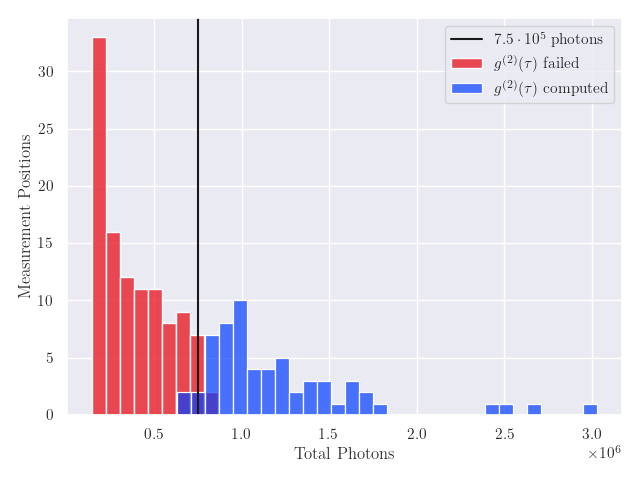

In [153]:
plt.figure()
BINWIDTH = 0.8*1e5
sns.set_palette("bright")
sns.histplot(data=df['g2_discarded'], binwidth=BINWIDTH, color="r", alpha = 0.7)
sns.histplot(data=df['g2_computed'], binwidth=BINWIDTH, color="b", alpha = 0.7)
plt.axvline(x=0.75*1e6, color="k")
plt.legend([r"$7.5 \cdot 10^{5}$ photons", r"$g^{(2)}(\tau)$ failed", r"$g^{(2)}(\tau)$ computed"])
plt.ylabel("Measurement Positions")
plt.xlabel("Total Photons")

plt.tight_layout()
plt.show()

plt.savefig("threshold_total_g2.pdf")
plt.savefig("threshold_total_g2.png", dpi=300, transparent=False)

<IPython.core.display.Javascript object>


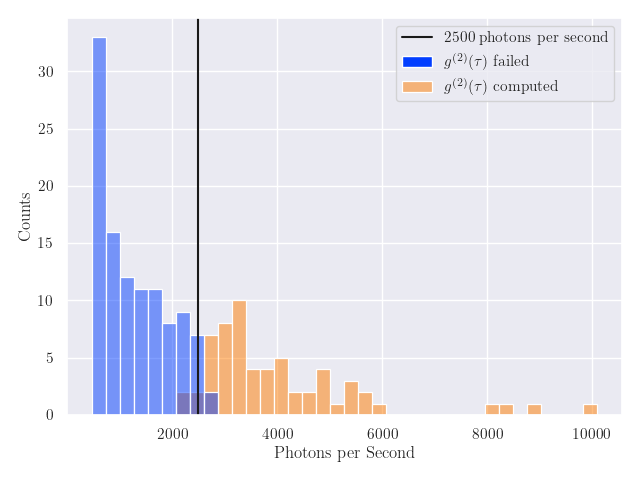

In [130]:
plt.figure()
BINWIDTH = 0.8*1e5/300
sns.set_palette("bright")
sns.histplot(data=df[['g2_discarded', 'g2_computed']]/300, binwidth=BINWIDTH, palette="bright")
plt.axvline(x=0.75*1e6/300, color="k")
plt.legend(["2500 photons per second", r"$g^{(2)}(\tau)$ failed", r"$g^{(2)}(\tau)$ computed"])
plt.ylabel("Counts")
plt.xlabel("Photons per Second")

plt.tight_layout()
plt.show()

plt.savefig("threshold_cps_g2.pdf")
plt.savefig("threshold_cps_g2.png", dpi=300, transparent=False)